# Motivation and Monte Carlo Method
One of the difficulties that investors face is evaluating the likelihood of stock price movement, or the possibility that the price will reach a specific level. One solution to this problem is to replicate price fluctuation using the Monte Carlo approach.

In the simplest terms, the Monte Carlo approach presupposes that a certain phenomena (price movement) is predictable, that we know its probability distribution, and that we can therefore mimic it. These assumptions are erroneous. As a result, an analyst must use caution when interpreting the results.
Let us begin our investigation. First, we'll determine what data to work with and download it. Second, we will create our model using GBM (Geometric Brownian Motion) and define essential model parameters. Finally, we'll run a simulation and visualize the results.


In [ ]:
import math
import random
import io
import requests

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from dateutil.relativedelta import relativedelta

We will utilize data from the previous 5 years to determine model parameters (anticipated annual return and expected yearly volatility). The period in which we build our assumptions is the most important aspect of the model. An analyst should select a timeframe that is most like the circumstances in the forecast period or manually give the value of projected annual return along with anticipated yearly volatility.

In [ ]:
ticker = '3175.HK'  # Use ticker format from https://stooq.com
interval_prediction = 1  # Forecast in years
number_of_simulations = 1000  # Set desired number of simulations
look_back_x_years = 5

Following that, we obtain the most recent historical data on the stock's prices, clean the data, and choose the period of time that interests us.


In [ ]:
target_url = 'https://stooq.com/q/d/l/?s={}&i=d'.format(ticker)
ticker_data = requests.get(target_url)
ticker_data = ticker_data.text
buffer = io.StringIO(ticker_data)
ticker_dataframe = pd.read_csv(buffer).drop(['Open', 'High', 'Low', 'Volume'], axis=1)
ticker_dataframe['Date'] = pd.to_datetime(ticker_dataframe['Date'], format='%Y-%m-%d', errors='ignore')

In [ ]:
pointer_date = ticker_dataframe['Date'].iloc[-1] + relativedelta(years = -look_back_x_years)

ticker_dataframe = ticker_dataframe[ticker_dataframe['Date'] >= pointer_date]

Let's take a look at our data.

In [ ]:
ticker_dataframe.head()

,Date,Close
642,2018-12-05,11.42
643,2018-12-06,11.50
644,2018-12-07,11.12
645,2018-12-10,11.40
646,2018-12-11,11.08


from matplotlib import pyplot as plt
_df_6['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Date', ylabel='Close'>

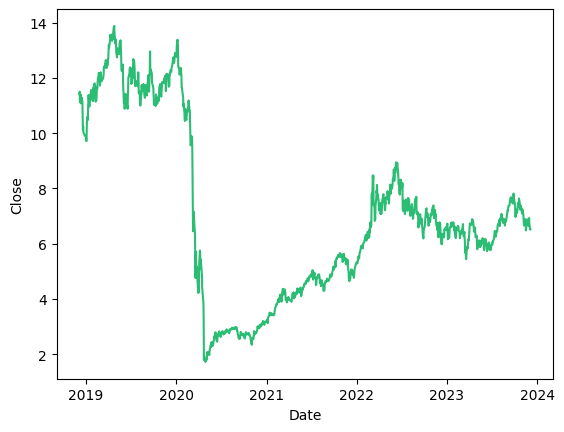

In [ ]:
sns.lineplot(data=ticker_dataframe, x='Date', y='Close', color = (0.17, 0.74, 0.45))

# Making the Model

## Monte Carlo Method:
Our Monte Carlo function is extremely simple: it iterates over the specified function a certain amount of times, records each iteration, and produces a list of outcomes.

## Geometric Brownian Motion Function
The Geometric Brownian Motion function the other hand, is a little more complicated. The equations we're employing are from a 2016 research article by Reddy and colleagues.


The final stock price is obtained from the following equation

$$S_{t + \Delta t}=S_{t} \exp[(\mu - \frac{\hat{\sigma}^{2}}{2})\Delta t + \hat{\sigma}\epsilon\sqrt{\Delta t}]$$

Where:
$$t \text{ - starting point in time}$$
$$\Delta t \text{ - forecast period}$$
$$S_{t} \text{ - price in t moment in time}$$
$$S_{t + \Delta t} \text{ - price at the end of the forecast period}$$
$$\mu \text{ - expected annual rate of return; in this example I use CAGR}$$
$$\hat{\sigma} \text{ - annualized expected annual volatility}$$
$$\epsilon \text{ - random volatility obtained as a random number drown from N(0, 1)}$$

To get the annualized expected annual volatility we use the following equation

$$\hat{\sigma} = \frac{s}{\sqrt{\tau}}$$

$$\tau = \frac{\Delta t}{N}$$

Where:
$$s \text{ - standard deviation of daily rate of return}$$
$$\tau \text{ - interval measured in years}$$
$$N \text{ - number of trading days in interval}$$

In [ ]:
def simple_monte_carlo(function, args, number_of_simulations):
    results = list()
    for x in range(number_of_simulations):
        results.append(function(*args))
    return results


def geometric_brownian_motion_stock_price(lastest_stock_price, expected_annual_return, expected_annual_volatility, interval_prediction):
    nrandom = random.normalvariate(0, 1)
    return lastest_stock_price * math.exp((expected_annual_return - 0.5 * expected_annual_volatility ** 2) * interval_prediction + expected_annual_volatility * nrandom * math.sqrt(interval_prediction))


def get_expected_annual_volatility(stock_prices):
    stock_daily_return = np.diff(stock_prices) / stock_prices[:len(stock_prices) - 1]
    stock_daily_return_sd = np.std(stock_daily_return)
    return stock_daily_return_sd / math.sqrt(look_back_x_years / len(stock_prices))

Next, we calculate model's key parameters.

In [ ]:
lastest_stock_price = ticker_dataframe['Close'].iloc[-1]
expected_annual_return = (ticker_dataframe['Close'].iloc[-1] / ticker_dataframe['Close'].iloc[0]) ** (1 / look_back_x_years) - 1  # CAGR
expected_annual_volatility = get_expected_annual_volatility(ticker_dataframe['Close'])

args = (lastest_stock_price, expected_annual_return, expected_annual_volatility, interval_prediction)

# Running the Simulation
Nothing remains but to run the simulation and plot the results.


In [ ]:
monte_carlo_simulation = simple_monte_carlo(geometric_brownian_motion_stock_price, args, number_of_simulations)

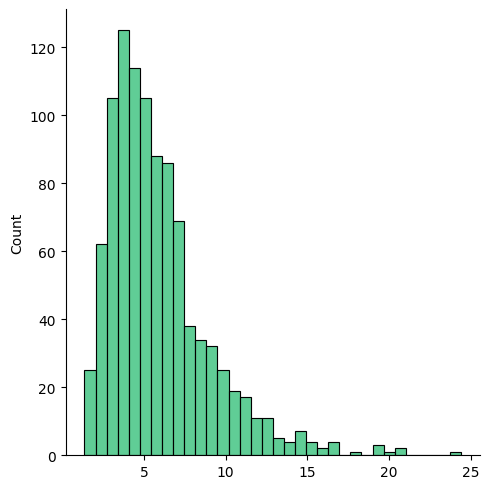

In [ ]:
sns.displot(monte_carlo_simulation, color = (0.17, 0.74, 0.45))

# Wrapping Up
We downloaded the data, prepared the model, and ran the simulation. From this point, we could start looking for percentiles that are of interest to us.

In [ ]:
percentiles = [5, 25, 50, 75, 95]
for percentile in percentiles:
    x = np.percentile(monte_carlo_simulation, percentile)
    print(f'{percentile} percentile: {x}')

5 percentile: 2.455772358969184
25 percentile: 3.7466479790837193
50 percentile: 5.181789348442312
75 percentile: 7.219908558053326
95 percentile: 11.709486269363019


# References
Reddy, Krishna and Clinton, Vaughan, Simulating Stock Prices Using Geometric Brownian Motion: Evidence from Australian Companies, Australasian Accounting, Business and Finance Journal, 10(3), 2016, 23-47. [doi:10.14453/aabfj.v10i3.3](http://dx.doi.org/10.14453/aabfj.v10i3.3)